# Random Sample imputation for Categorical Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('house-train.csv', usecols = ['FireplaceQu', 'GarageQual', 'SalePrice'])

In [3]:
df.sample(4)

,FireplaceQu,GarageQual,SalePrice
1178,Gd,Fa,154900
102,NaN,TA,118964
1356,NaN,TA,110000
1242,TA,TA,170000


### Checking Null values

In [4]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

### Creatign X and Y 


In [5]:
x = df
y = df['SalePrice']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 2)

In [7]:
x_train

,FireplaceQu,GarageQual,SalePrice
455,TA,TA,175500
863,NaN,TA,132500
504,Fa,TA,147000
1413,Gd,TA,257000
1389,Gd,TA,131000
...,...,...,...
466,Po,TA,167000
299,Gd,TA,158500
493,Fa,TA,155000
527,Gd,TA,446261


### New column create in Both Garage & Fire place

In [8]:
x_train['GarageQual_imputed'] = x_train['GarageQual'] 
x_test['GarageQual_imputed'] = x_test['GarageQual'] 
x_train['FireplaceQu_imputed'] = x_train['FireplaceQu']
x_test['FireplaceQu_imputed'] = x_test['FireplaceQu']

### Replace Garage Value and Fireplace Imputed

In [15]:
x_train.loc[x_train['GarageQual_imputed'].isnull(), 'GarageQual_imputed'] = x_train['GarageQual'].dropna().sample(x_train['GarageQual_imputed'].isnull().sum(), random_state=42).values
x_test.loc[x_test['GarageQual_imputed'].isnull(), 'GarageQual_imputed'] = x_train['GarageQual'].dropna().sample(x_test['GarageQual_imputed'].isnull().sum(), random_state= 42).values
x_train.loc[x_train['FireplaceQu_imputed'].isnull(), 'FireplaceQu_imputed'] = x_train['FireplaceQu'].dropna().sample(x_train['FireplaceQu_imputed'].isnull().sum(), random_state = 42).values
x_test.loc[x_test['FireplaceQu_imputed'].isnull(),'FireplaceQu_imputed'] = x_train['FireplaceQu'].dropna().sample(x_test['FireplaceQu_imputed'].isnull().sum(), random_state = 42).values

In [16]:
x_train.sample(10, random_state=42), x_test.sample(10, random_state=42)

(     FireplaceQu GarageQual  SalePrice GarageQual_imputed FireplaceQu_imputed
 913          NaN         TA     145000                 TA                  TA
 392          NaN         TA     106500                 TA                  Gd
 99           NaN        NaN     128950                 TA                  TA
 1209          Gd         TA     290000                 TA                  Gd
 746           TA         TA     236000                 TA                  TA
 432          NaN         TA     122500                 TA                  Gd
 113           Gd         TA     217000                 TA                  Gd
 1058          Gd         TA     335000                 TA                  Gd
 251           Gd         TA     235000                 TA                  Gd
 345           Gd         TA     140200                 TA                  Gd,
      FireplaceQu GarageQual  SalePrice GarageQual_imputed FireplaceQu_imputed
 188           TA         TA     153337            

### Review Frequency in Garage Original & Imputed

In [28]:
temp = pd.concat(
   [x_train['GarageQual'].value_counts() / len(x_train['GarageQual'].dropna()), 
    x_train['GarageQual_imputed'].value_counts() / len(x_train)], axis =1
)
temp.columns = ['Original','Imputed']

In [29]:
temp

,Original,Imputed
TA,0.951043,0.952055
Fa,0.037171,0.036815
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


### Review Frequency in Fireplace Original & Imputed

In [32]:
temp = pd.concat(
    [x_train['FireplaceQu'].value_counts() / len(x_train['FireplaceQu'].dropna()),
    x_train['FireplaceQu_imputed'].value_counts() / len(x_train)], axis = 1
)
temp.columns = ['Original', 'Imputed']

In [34]:
temp

,Original,Imputed
Gd,0.494272,0.500000
TA,0.412439,0.406678
Fa,0.040917,0.040240
Po,0.027823,0.028253
Ex,0.024550,0.024829


### Compare category Fireplace before Imputation

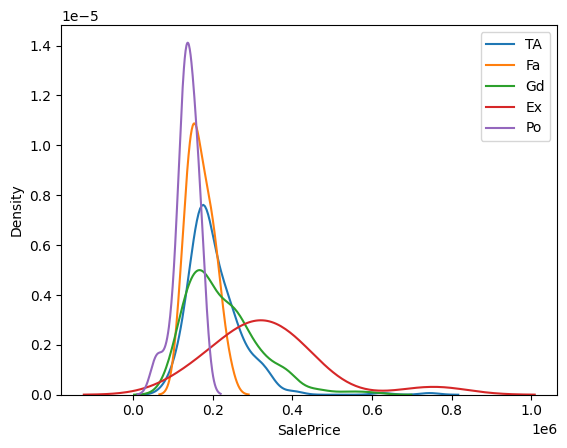

In [45]:
for category in x_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'], label = category)
plt.legend()
plt.show()

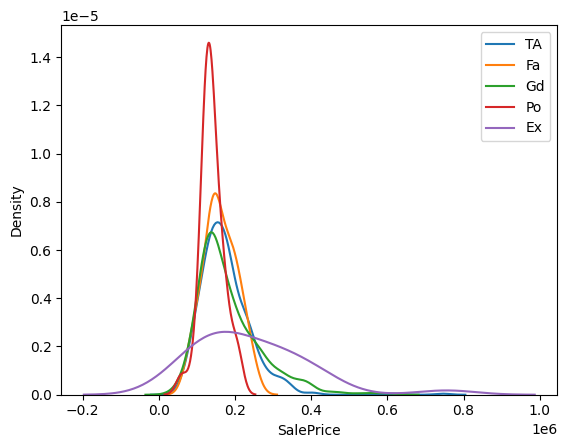

In [47]:
for category in x_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(x_train[x_train['FireplaceQu_imputed'] == category]['SalePrice'], label = category)
plt.legend()
plt.show()